In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

将类内距离用欧氏距离，用最短距离做类间分类，对下面几种啤酒进行聚类，将聚类过程用矩阵变化描述出来。

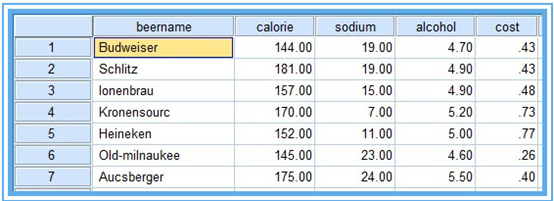

In [4]:
d = pd.read_csv('beer.csv')
d = d.set_index('beername')
d.head()

,calorie,sodium,alcohol,cost
beername,,,,
Budweiser,144.0,19.0,4.7,43
Schlitz,181.0,19.0,4.9,43
lonenbrau,157.0,15.0,4.9,48
Kronensourc,170.0,7.0,5.2,73
Heineken,152.0,11.0,5.0,77


In [17]:
from scipy.cluster.hierarchy import fcluster,fclusterdata
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

In [6]:
z = linkage(d,method='single')

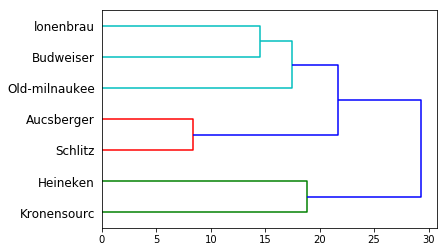

In [9]:
dd = dendrogram(z,orientation='right',labels=d.index.tolist())

In [56]:
#这个值设置为18四类，20会分成3类，25为两类，30一类
r1 = fcluster(z,t=20,criterion='distance',)
r1

array([3, 2, 3, 1, 1, 3, 2], dtype=int32)

In [20]:
r2 = fclusterdata(d,t=?,criterion='distance',metric='euclidean',method='single')
r2

array([5, 3, 6, 1, 2, 7, 4], dtype=int32)

In [21]:
from sklearn.cluster import AgglomerativeClustering as AC

In [26]:
dm = AC(n_clusters=3,linkage='ward',affinity='euclidean')
dm.fit(d)
dm.labels_

array([0, 2, 0, 1, 1, 0, 2], dtype=int32)

In [39]:
d_index = pd.DataFrame(d.index.tolist(),columns=['index'])
d_cluster = pd.DataFrame(dm.labels_,columns=['skl_cluster'])
r1_cluster = pd.DataFrame(r1,columns=['sci_cluster'])

In [40]:
res = pd.concat([d_index,d_cluster],axis=1)
res.set_index('index').T

index,Budweiser,Schlitz,lonenbrau,Kronensourc,Heineken,Old-milnaukee,Aucsberger
skl_cluster,0,2,0,1,1,0,2


In [41]:
res1 = pd.concat([d_index,r1_cluster],axis=1)
res1.set_index('index').T

index,Budweiser,Schlitz,lonenbrau,Kronensourc,Heineken,Old-milnaukee,Aucsberger
sci_cluster,3,2,3,1,1,3,2
